In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import data as wb
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

### Importing Data

In [2]:
stocks = input().split()
assets = [stock.upper() + '.NS' for stock in stocks]
assets



20MICRONS 21STCENMGM  3IINFOTECH 	3MINDIA


['20MICRONS.NS', '21STCENMGM.NS', '3IINFOTECH.NS', '3MINDIA.NS']

In [3]:
years = float(input('No. of year data you want to analyze: '))

No. of year data you want to analyze: 5


In [4]:
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days= 365 * years)
startDate

datetime.datetime(2016, 6, 30, 11, 39, 24, 184677)

In [5]:
pf_data = wb.get_data_yahoo(assets, start=startDate, end=endDate)['Adj Close']

In [6]:
pf_data


Symbols,20MICRONS.NS,21STCENMGM.NS,3IINFOTECH.NS,3MINDIA.NS
Date,,,,
2016-06-30,28.311230,NaN,5.10,12823.349609
2016-07-01,28.644861,NaN,5.00,13285.250000
2016-07-04,28.406553,NaN,5.05,13986.849609
2016-07-05,28.930836,NaN,5.10,13791.549805
2016-07-07,28.406553,NaN,5.35,13652.400391
...,...,...,...,...
2021-06-23,62.049999,20.600000,10.60,25495.550781
2021-06-24,63.400002,21.000000,10.10,25258.900391
2021-06-25,62.500000,21.400000,9.60,25060.449219


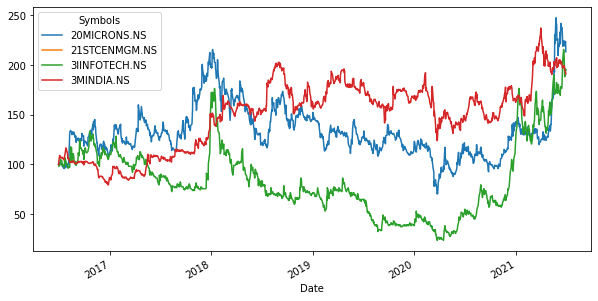

In [7]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize= (10,5))
plt.show()

### Returns

In [8]:
returns = (pf_data / pf_data.shift(1)) - 1
returns

Symbols,20MICRONS.NS,21STCENMGM.NS,3IINFOTECH.NS,3MINDIA.NS
Date,,,,
2016-06-30,NaN,NaN,NaN,NaN
2016-07-01,0.011784,NaN,-0.019608,0.036020
2016-07-04,-0.008319,NaN,0.010000,0.052810
2016-07-05,0.018456,NaN,0.009901,-0.013963
2016-07-07,-0.018122,NaN,0.049020,-0.010089
...,...,...,...,...
2021-06-23,-0.014297,0.019802,-0.027523,-0.003003
2021-06-24,0.021757,0.019417,-0.047170,-0.009282
2021-06-25,-0.014196,0.019048,-0.049505,-0.007857


In [9]:
annual_returns = returns.mean() * 250 *100
annual_returns

Symbols
20MICRONS.NS     27.739876
21STCENMGM.NS    -7.112816
3IINFOTECH.NS    31.987769
3MINDIA.NS       18.114148
dtype: float64

In [10]:
num_assets = len(assets)

### Random Weights

In [11]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.12957982, 0.29692299, 0.33661737, 0.23687981])

### Mean Annual Returns

In [12]:
np.sum(weights * returns.mean()) * 250

0.16541084255921676

### annual Variance

In [13]:
np.dot(weights.T, np.dot(returns.cov() * 250, weights))

0.07284658279093884

### annual covariance

In [14]:
np.sqrt(np.dot(weights.T,np.dot(returns.cov() * 250, weights)))

0.2699010611148812

### Correlation

In [15]:
corr_matrix = returns.corr()
corr_matrix

Symbols,20MICRONS.NS,21STCENMGM.NS,3IINFOTECH.NS,3MINDIA.NS
Symbols,,,,
20MICRONS.NS,1.000000,0.076067,0.186022,0.205093
21STCENMGM.NS,0.076067,1.000000,0.054441,0.079774
3IINFOTECH.NS,0.186022,0.054441,1.000000,0.150398
3MINDIA.NS,0.205093,0.079774,0.150398,1.000000


### 1000 Random weights

In [16]:
pfolio_returns = []
pfolio_volatilities = []
pfolio_weights = []

for x in range (5000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov() * 250, weights))))
    pfolio_weights.append(weights)
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
#pfolio_weights = pfolio_weights.tolist()

pfolio_returns, pfolio_volatilities, pfolio_weights

(array([0.14835656, 0.21013907, 0.20771447, ..., 0.19440246, 0.12945182,
        0.13392268]),
 array([0.23397659, 0.29150161, 0.31574953, ..., 0.32393722, 0.21801572,
        0.23032447]),
 [array([0.29698198, 0.29063062, 0.08610355, 0.32628386]),
  array([0.30144876, 0.16323666, 0.2966825 , 0.23863208]),
  array([0.11404873, 0.17358831, 0.42804995, 0.28431301]),
  array([0.09232262, 0.36914339, 0.14772092, 0.39081307]),
  array([0.16026004, 0.3937447 , 0.28723458, 0.15876068]),
  array([0.01617697, 0.25641553, 0.24552691, 0.48188059]),
  array([0.20554488, 0.43269121, 0.03590414, 0.32585977]),
  array([0.12761372, 0.47020397, 0.3156691 , 0.08651321]),
  array([0.27816662, 0.1919653 , 0.31608653, 0.21378155]),
  array([0.28726792, 0.23072061, 0.09664442, 0.38536705]),
  array([0.40678778, 0.09361824, 0.46058618, 0.0390078 ]),
  array([0.16729651, 0.3758921 , 0.26552547, 0.19128592]),
  array([0.32757588, 0.05736596, 0.21451686, 0.40054129]),
  array([0.30708877, 0.17739393, 0.4145942 

In [17]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})


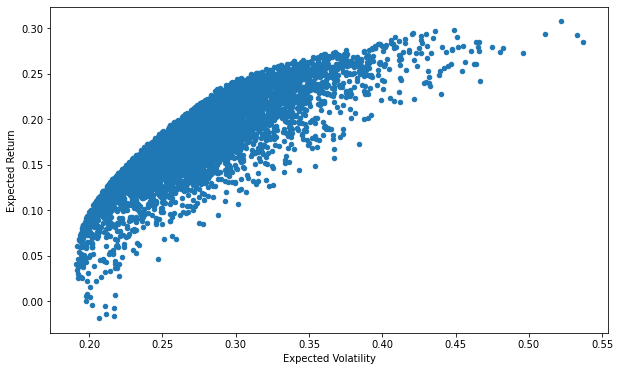

In [18]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.show()

In [19]:
max_return = max(pfolio_returns)
max_return


0.30765782883052406

In [20]:
max_rindex = np.where(pfolio_returns == max_return)
print(max_rindex)

(array([4134]),)


In [21]:
max_rvolatility = pfolio_volatilities[max_rindex[0][0]]
max_rvolatility

0.5219793717828131

In [22]:
max_rweights = pfolio_weights[max_rindex[0][0]]
max_rweights

array([0.16533572, 0.00716838, 0.81024232, 0.01725357])

In [23]:
min_volatility = pfolio_volatilities.min()

min_volatility

0.1910014543194944

In [24]:
min_vindex = np.where(pfolio_volatilities == min_volatility)
min_vindex

(array([2761]),)

In [25]:
min_vreturns = pfolio_returns[min_vindex[0][0]]
min_vreturns

0.04143355288387112

In [26]:
min_vweights = pfolio_weights[min_vindex[0][0]]
min_vweights

array([0.07152106, 0.6063357 , 0.04589816, 0.27624508])

In [27]:
max_sr = []
max_sr =  [str(round(max_return * 100,3) ) + '%', str(round(max_rvolatility * 100,3)) + '%']
for i in range(num_assets):
    max_sr.append(str(round(max_rweights[i] * 100,3)) + '%')
max_sr

['30.766%', '52.198%', '16.534%', '0.717%', '81.024%', '1.725%']

In [28]:
min_vol = []
min_vol =  [str(round(min_vreturns*100,3)) + '%', str(round(min_volatility * 100,3)) + '%']
for i in range(num_assets):
    min_vol.append(str(round(min_vweights[i] *100,3)) + '%')
min_vol

['4.143%', '19.1%', '7.152%', '60.634%', '4.59%', '27.625%']

In [29]:
#Max Sharpe Ratio
MaxSharpeRatio = go.Scatter(
    name='Maximium Sharpe Ratio',
    mode='markers',
    x=[max_rvolatility],
    y=[max_return],
    marker=dict(color='red',size=14,line=dict(width=3, color='black'))
)

#Min Vol
MinVol = go.Scatter(
    name='Mininium Volatility',
    mode='markers',
    x=[min_volatility],
    y=[min_vreturns],
    marker=dict(color='green',size=14,line=dict(width=3, color='black'))
)

#Random portfolio
EF_curve = go.Scatter(
    name='Random Portfolios',
    mode='markers',
    x= pfolio_volatilities,
    y= pfolio_returns,
    marker=dict(color='blue',size=5)
)

data = [MaxSharpeRatio, MinVol, EF_curve]

layout = go.Layout(
    title = 'Portfolio Optimisation with the Efficient Frontier',
    yaxis = dict(title='Annualised Return'),
    xaxis = dict(title='Annualised Volatility'),
    showlegend = True,
    legend = dict(
        x = .70, y = 0, traceorder='normal',
        bgcolor='#E2E2E2',
        bordercolor='black',
        borderwidth=2),
    width=800,
    height=600)

fig = go.Figure(data=data, layout=layout)
fig.show()

### Max Sharpe ratio and Min volatility table with required weights of stocks

In [30]:
col = []
col =  ['Returns', 'Volatility']
for i in range(num_assets):
    col.append(assets[i])

In [31]:
result_table = pd.DataFrame(columns  = [col], index=['maximum sharpe ratio', 'minimun volatility'])
result_table.iloc[0] = max_sr
result_table.iloc[1] = min_vol

In [32]:
result_table

,Returns,Volatility,20MICRONS.NS,21STCENMGM.NS,3IINFOTECH.NS,3MINDIA.NS
maximum sharpe ratio,30.766%,52.198%,16.534%,0.717%,81.024%,1.725%
minimun volatility,4.143%,19.1%,7.152%,60.634%,4.59%,27.625%


### Correlation Graph

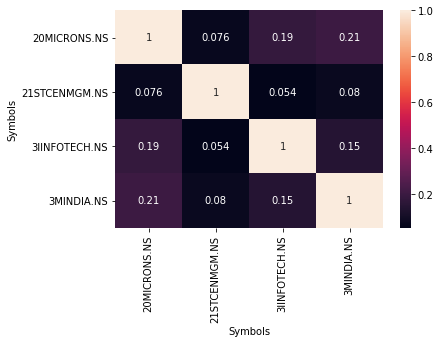

In [33]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [34]:
trace = go.Heatmap(
   x = assets,
   y = assets,
   z = corr_matrix,
   type = 'heatmap',
   colorscale = 'Viridis',
   hovertemplate = "%{z}"
)
layout = go.Layout(
    title = 'Correlation',
    yaxis = dict(title='Stocks'),
    xaxis = dict(title='Stocks'),
    showlegend = False,
    width=500,
    height=500)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [35]:
from pandas_datareader.data import DataReader
from datetime import datetime


In [36]:
# Get the stock quote
df = DataReader('SBIN.NS', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,163.600006,161.139999,162.899994,162.764999,14464990.0,147.880875
2012-01-03,171.000000,164.300003,164.399994,170.565002,21341020.0,154.967636
2012-01-04,171.389999,167.520004,171.199997,169.604996,22241630.0,154.095413
2012-01-05,171.854996,168.005005,169.600006,169.244995,21344840.0,153.768341
2012-01-06,170.759995,165.804993,167.500000,167.274994,21137420.0,151.978455
...,...,...,...,...,...,...
2021-06-23,424.750000,415.000000,421.100006,418.850006,27564829.0,418.850006
2021-06-24,422.750000,416.299988,420.350006,417.200012,19214547.0,417.200012
2021-06-25,431.000000,419.049988,421.000000,428.799988,29886797.0,428.799988


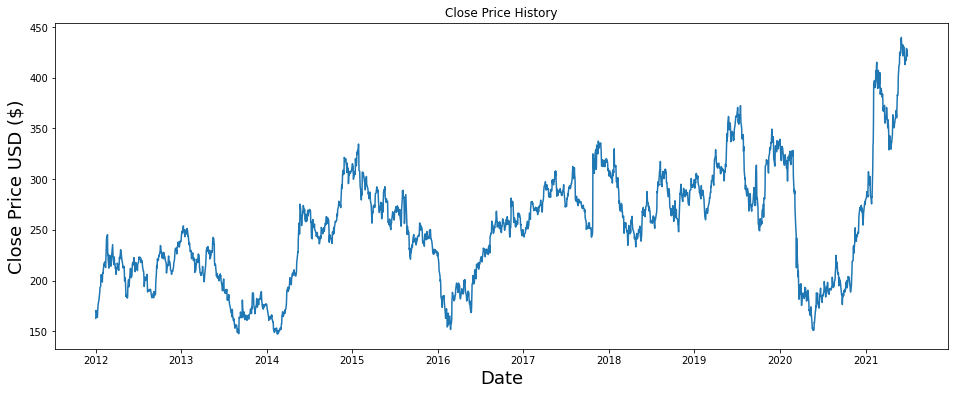

In [37]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

***Prediction Functions:***

In [38]:
# Importing Required Library

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [39]:
## Scaling the data set as required

def Scale_data_set(data):

  dataset = data.values
  # Get the number of rows to train the model on
  training_data_len = int(np.ceil( len(dataset) * .95 ))

  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(dataset)
  return training_data_len, scaled_data, dataset, scaler

In [40]:
## Creating a dataSet to be trained by LSTM

def Creating_training_data(training_data_len, scaled_data):
  # Create the training data set 
  # Create the scaled training data set
  train_data = scaled_data[0:int(training_data_len), :]
  # Split the data into x_train and y_train data sets
  x_train = []
  y_train = []

  for i in range(60, len(train_data)):
      x_train.append(train_data[i-60:i, 0])
      y_train.append(train_data[i, 0])
      
          
  # Convert the x_train and y_train to numpy arrays 
  x_train, y_train = np.array(x_train), np.array(y_train)

  # Reshape the data
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  # x_train.shape

  return x_train, y_train

In [41]:
## Training by  LSTM

def LSTM_model(x_train, y_train):
  
  # Build the LSTM model
  model = Sequential()
  model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
  model.add(LSTM(64, return_sequences=False))
  model.add(Dense(25))
  model.add(Dense(1))

  # Compile the model
  model.compile(optimizer='adam', loss='mean_squared_error')

  # Train the model
  model.fit(x_train, y_train, batch_size=1, epochs=1)

  return model

In [42]:
## Predicting data using the trained value

def miscellaneous(model, training_data_len, scaled_data, dataset, scaler):
  # Create the testing data set
  # Create a new array containing scaled values from index 1543 to 2002 
  test_data = scaled_data[training_data_len - 60: , :]
  # Create the data sets x_test and y_test
  x_test = []
  y_test = dataset[training_data_len:, :]
  for i in range(60, len(test_data)):
      x_test.append(test_data[i-60:i, 0])
      
  # Convert the data to a numpy array
  x_test = np.array(x_test)

  # Reshape the data
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

  # Get the models predicted price values 
  predictions = model.predict(x_test)
  predictions = scaler.inverse_transform(predictions)

  # Get the root mean squared error (RMSE)
  rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

  return predictions, rmse

In [43]:
## Ploting the chart with predicted values

def Ploting_Prediction(predictions ,training_data_len, data, title):
  # Plot the data
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = predictions
  # Visualize the data
  plt.figure(figsize=(16,6))
  plt.title(title)
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price in Rs', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
  plt.show()

  return train, valid

In [44]:
##  Compiling all functions to one functions

def Stock_prediction(data, title):
  training_data_len, scaled_data, dataset, scaler = Scale_data_set(data)
  x_train, y_train = Creating_training_data(training_data_len, scaled_data)
  model = LSTM_model(x_train, y_train)
  predictions, rmse = miscellaneous(model, training_data_len, scaled_data, dataset, scaler)
  train, valid = Ploting_Prediction(predictions ,training_data_len, data, title)

  return train, valid, rmse, predictions

Sending Data for Prediction:

In [45]:
data = {}
for st in assets:
  data['{}'.format(st)] = pf_data.filter([st])

1110/1110 [==============================] - 46s 27ms/step - loss: 0.0070


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



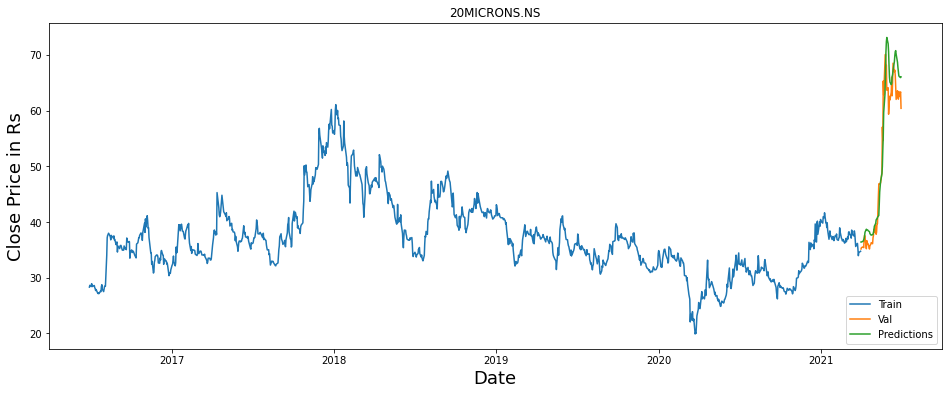

'root mean squared error' of 20MICRONS.NS = 4.032651866557595
1110/1110 [==============================] - 33s 27ms/step - loss: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



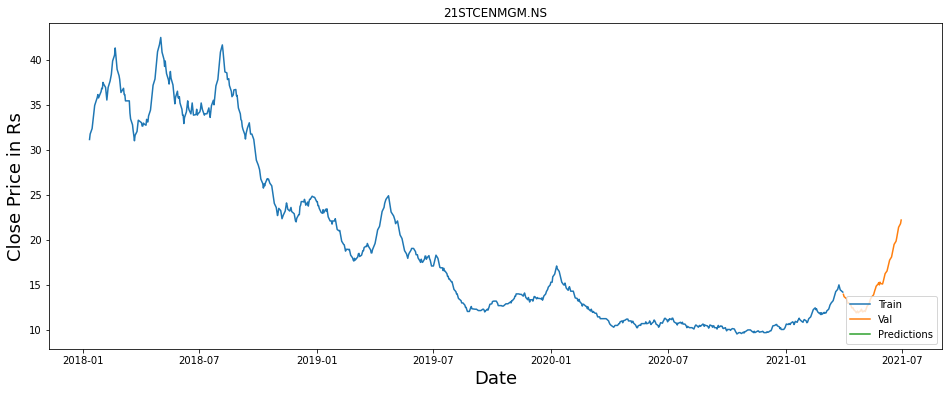

'root mean squared error' of 21STCENMGM.NS = nan
1110/1110 [==============================] - 33s 27ms/step - loss: 0.0037


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



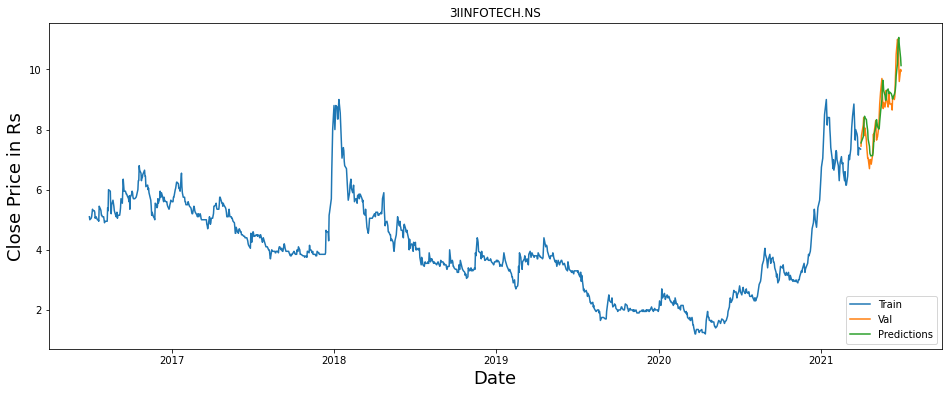

'root mean squared error' of 3IINFOTECH.NS = 0.4830555804368926
1110/1110 [==============================] - 33s 28ms/step - loss: 0.0066


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



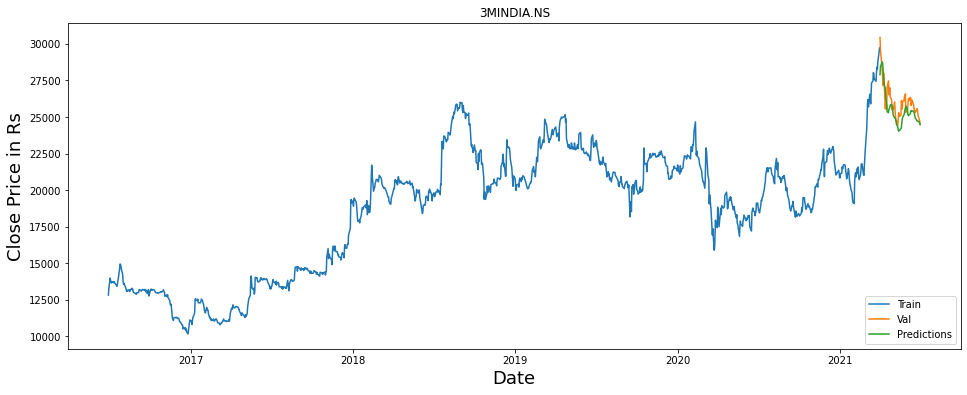

'root mean squared error' of 3MINDIA.NS = 895.6664412290739


In [46]:
for i in assets:
  DATA = data[i]
  DATA = DATA.rename(columns = {i:"Close"})
  train, valid, rmse, predictions = Stock_prediction(DATA, i)
  print("'root mean squared error' of {} = ".format(i) + str(rmse))


# **🙂🙂🙂**